## Imports and data load

In [28]:
import copy
%matplotlib inline
#%matplotlib qt

import matplotlib.pyplot as pyplot
import utils
from Wear import *
import numpy as np
import glob
from scipy.interpolate import interp1d
from copy import deepcopy
import statistics as stats
import math
import locale
locale.setlocale(locale.LC_NUMERIC, ('pl_PL', 'UTF-8'))
from matplotlib.ticker import MultipleLocator

fileList = sorted(glob.glob('data/wear/*/wynik*.TXT'))
print(fileList)
sampleList = [utils.read_wear_data(file) for file in fileList]

['data/wear/A  1pc/wynik1mN.TXT', 'data/wear/A  2pc/wynik1mN.TXT', 'data/wear/A  4pc/wynik1mN.TXT', 'data/wear/A  8pc/wynik1mN.TXT', 'data/wear/R  1pc/wynik1mN.TXT', 'data/wear/R  2pc/wynik1mN.TXT', 'data/wear/R  4pc/wynik1mN.TXT', 'data/wear/R  8pc/wynik1mN.TXT', 'data/wear/R 12pc/wynik1mN.TXT', 'data/wear/R 16pc/wynik1mN.TXT', 'data/wear/R 20pc/wynik1mN.TXT', 'data/wear/ref/wynik1mN.TXT']


## Read and display moving maximum data as a function of sample number

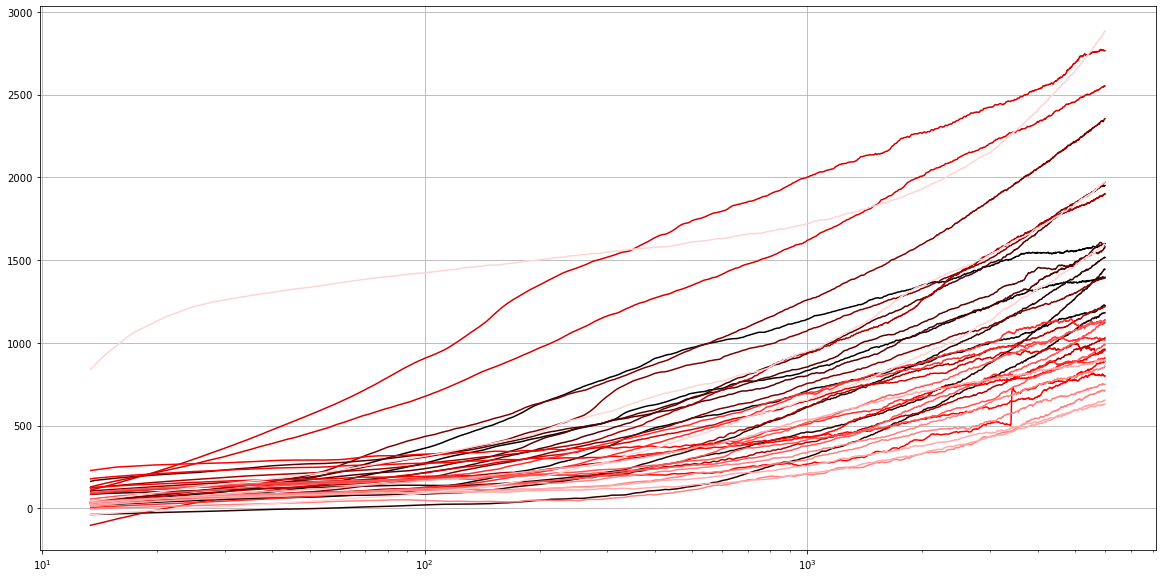

In [29]:
fig = pyplot.figure(figsize=(20,10))
ax = fig.add_subplot(111)

nameList = []
for idx,name in enumerate(fileList):
    newName = name[0:name.rfind("/")]
    newName = newName[newName.rfind("/")+1:]
    nameList.append(newName)
    
# for sample in sampleList:
#     for idx,wear in enumerate(sample):
#         wear.correct_drift(18500, len(wear.depth))

        
sampleList2 = deepcopy(sampleList)   
for sample in sampleList2:
    for idx,wear in enumerate(sample):
        wear.process_depth_and_friction()
        wear.truncate(40,None)
        wear.trim_to_time()
        #wear.truncate(0,17732)
        #wear.truncate(0,18000)
        #print(len(wear.depth_min))
        
utils.plot_wear_samples(ax, sampleList2, nameList=nameList, color=0, xaxis="time", yaxis="max")  
pyplot.xscale('log')
#pyplot.yscale('log')
ax.grid()


## Display turncated moving max from depth data (raw, unprocessed data)

In [ ]:
def wear_postprocess(wear: Wear):
    wear.process_depth_and_friction()
    #wear.correct_drift(18500, len(wear.depth))
    #wear.truncate(10,17700)

def wear_remove_offset(wear: Wear):
    wear.depth_max = wear.depth_max - wear.depth_max[0]
    wear.depth_min = wear.depth_min - wear.depth_min[0]
    wear.depth = wear.depth - wear.depth[0]

figsize=(16,5)
sampleListMax2 = deepcopy(sampleList)


# for sample in sampleListMax2:
#     for idx,wear in enumerate(sample):
#         wear_postprocess(wear)

#shit_wear = sampleListMax2[11][0]
#shit_wear.depth = shit_wear.depth / shit_wear.depth_max * np.mean(np.array([sampleListMax2[11][1].depth_max, sampleListMax2[11][2].depth_max, sampleListMax2[0][0].depth_max]), axis=0)
#shit_wear.process_depth_and_friction()
#print(shit_wear.depth_max[-1])

for sample in sampleListMax2:
    for idx,wear in enumerate(sample):
        #wear_remove_offset(wear)
        #wear.calculate_wear_area()
        pass

#$sampleListMax[11].pop(2)
#sampleListMax[11].pop(1)
#sampleListTrunc[5].pop(0) #huge outlier
#sampleListTrunc[6].pop(2) #jump in data
#sampleListTrunc[10].pop(2)
#sampleListTrunc[6].pop(1)

sample_number = len(sampleListMax2)
plot_row_number = math.ceil(sample_number / 2)

for n in range(sample_number):
    if n%2 == 0:
        fig_max = pyplot.figure(figsize=figsize)
    ax = fig_max.add_subplot(1, 2, n%2 + 1)
    #ax.set_ylim(0, 2000)
    utils.plot_wear_samples(ax, [sampleListMax2[n]], nameList=[nameList[n]], color= 0.3, color_offset=3, yaxis="depth", xaxis="time")
    #utils.plot_wear_samples(ax, [sampleListMax[n]], nameList=[nameList[n]], color= 0.3, color_offset=3, yaxis="depth", xaxis="time")
    #utils.plot_wear_samples(ax, [sampleListMax[n]], nameList=[nameList[n] + "min"], color= 0.5, color_offset=3, yaxis="wear_area_min", xaxis="time")
    ax.set_title(nameList[n])
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Pole powierzchni przekroju żłobienia [μm$^2$]")


## Display turncated moving max from depth data

In [ ]:
def wear_postprocess(wear: Wear):
    wear.process_depth_and_friction()
    #wear.correct_drift(18500, len(wear.depth))
    wear.truncate(10,17700)

def wear_remove_offset(wear: Wear):
    wear.depth_max = wear.depth_max - wear.depth_max[0]
    wear.depth_min = wear.depth_min - wear.depth_min[0]
    wear.depth = wear.depth - wear.depth[0]

figsize=(16,5)
sampleListMax = deepcopy(sampleList)


for sample in sampleListMax:
    for idx,wear in enumerate(sample):
        wear_postprocess(wear)

shit_wear = sampleListMax[11][0]
better_wear = sampleListMax[11][1]
shit_wear.depth = shit_wear.depth / shit_wear.depth_max * np.mean(np.array([sampleListMax[11][1].depth_max, sampleListMax[11][2].depth_max, sampleListMax[0][0].depth_max]), axis=0)
shit_wear.process_depth_and_friction()
print(shit_wear.depth_max[-1])

for sample in sampleListMax:
    for idx,wear in enumerate(sample):
        wear_remove_offset(wear)
        wear.calculate_wear_area()

#$sampleListMax[11].pop(2)
#sampleListMax[11].pop(1)
#sampleListTrunc[5].pop(0) #huge outlier
#sampleListTrunc[6].pop(2) #jump in data
#sampleListTrunc[10].pop(2)
#sampleListTrunc[6].pop(1)

sample_number = len(sampleListMax)
plot_row_number = math.ceil(sample_number / 2)


#sample_order = range(-1, sample_number-1)
sample_order = [sample_number-1] + list(range(sample_number-1))

for ax_num in range(sample_number):
    if ax_num%2 == 0:
        # Create a new figure
        fig_max = pyplot.figure(figsize=figsize)
    sample_number = sample_order[ax_num]
    print((ax_num, nameList[sample_number]))
    ax = fig_max.add_subplot(1, 2, ax_num%2 + 1)
    #ax.set_ylim(0, 2000)
    utils.plot_wear_samples(ax, [sampleListMax[sample_number]], nameList=[nameList[sample_number]], color= 0.3, color_offset=3, yaxis="wear_area", xaxis="time")
    #utils.plot_wear_samples(ax, [sampleListMax[sample_number]], nameList=[nameList[sample_number]], color= 0.3, color_offset=3, yaxis="depth", xaxis="time")
    #utils.plot_wear_samples(ax, [sampleListMax[sample_number]], nameList=[nameList[sample_number] + "min"], color= 0.5, color_offset=3, yaxis="wear_area_min", xaxis="time")
    ax.set_title(nameList[sample_number])
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Pole powierzchni przekroju żłobienia [μm$^2$]")
    ax.set_ylim(0, 18)


## Display turncated moving max from friction data

### Note: It's not feasible to use this kind of experiment for friction coefficient estimation. We get mix of static and kinetic frictional force

In [ ]:
fig_fric = pyplot.figure(figsize=(15,30))
FINISH_TIME = 5500

sampleListFric = deepcopy(sampleListMax)

for sample in sampleListFric:
    for idx,wear in enumerate(sample):
        wear.truncate(40,None)
        wear.trim_to_time(FINISH_TIME)


#utils.plot_wear_samples(ax2, sampleListFric[0:4], nameList=nameList[0:4], color= 0)
sampleListFric[11].pop(0)
# sampleListFric[5].pop(0) #huge outlier
# sampleListFric[6].pop(2) #jump in data
# sampleListFric[10].pop(2)
##sampleListFric[6].pop(1)
# dorobić dla n=9,10
sample_number = len(sampleListFric)
plot_row_number = math.ceil(sample_number / 2)

for n in range(sample_number):
    ax_fric = fig_fric.add_subplot(plot_row_number, 2, n+1)
    # utils.plot_wear_samples(ax_fric, [sampleListFric[n]], nameList=[nameList[n]], color= 0.9, color_offset=3, yaxis="fric_coeff_peak")
    utils.plot_wear_samples(ax_fric, [sampleListFric[n]], nameList=[nameList[n]], color= 0.9, color_offset=3, yaxis="fric_coeff_peak", xaxis="time")
    ax_fric.set_title(nameList[n])
##utils.plot_wear_samples(ax2, sampleListFric, nameList=nameList, color= 0.5)

## Steady state wear rate estimation

In [ ]:
WEAR_EXPERIMENT_TIME = 5800 # [s]
STEADY_STATE_WEAR_TIME_RANGE = (3000, 5799)
INITIAL_WEAR_TIME_RANGE = (0, 1000)

def get_sample_numbers_for_measurement_range(wear, measurment_type, measurment_range):
    measurement = getattr(wear, measurment_type)
    start_index = np.argmax(measurement > measurment_range[0])
    stop_index = np.argmax(measurement > measurment_range[1])
    return start_index, stop_index


wear_rate_from_max_list = []
wear_rate_from_min_list = []
sampleListForWearRate = deepcopy(sampleListMax)
for sample in sampleListForWearRate:
    sample_wear_rate_from_max = []
    sample_wear_rate_form_min = []
    for wear in sample:
        print(wear.time[-1])
        wear_rate_from_max = np.polyfit(wear.time, wear.wear_area, 1)[0]
        wear_rate_from_min = np.polyfit(wear.time, wear.wear_area_min, 1)[0]
        sample_wear_rate_from_max.append(wear_rate_from_max)
        sample_wear_rate_form_min.append(wear_rate_from_min)
    wear_rate_from_max_list.append(sample_wear_rate_from_max)
    wear_rate_from_min_list.append(sample_wear_rate_form_min)
    
sample_mean_wear_rates_from_max = []
sample_mean_wear_rates_from_min = []
sqr3 = math.sqrt(3)

for idx in range(len(wear_rate_from_max_list)):
    sample_mean_wear_rates_from_max.append( (stats.mean(wear_rate_from_max_list[idx]), stats.stdev(wear_rate_from_max_list[idx])/sqr3 ))
    sample_mean_wear_rates_from_min.append( (stats.mean(wear_rate_from_min_list[idx]), stats.stdev(wear_rate_from_min_list[idx])/sqr3) )
           

fig4 = pyplot.figure(figsize=(15,10))
ax4 = fig4.add_subplot(211)
ax5 = fig4.add_subplot(212)
#x = range(len(sample_mean_wear_rates_from_max))
y = list(map(list, zip (*sample_mean_wear_rates_from_max)))
x = [0, 1, 2, 4, 8, 1, 2, 4, 8, 12, 16, 20]
ax4.errorbar(x[0:5], y[0][0:5], yerr=y[1][0:5], fmt = '-o')
ax5.errorbar([x[0]]+x[5:], [y[0][0]]+y[0][5:], yerr=[y[1][0]]+y[1][5:], fmt = '-o')
ax4.set_ylim(0)
ax4.set_xlabel("zawartość nanocząstek (procent wagowy) [%]")
ax4.set_ylabel("prędkość zużycia [nm/s]")
ax4.set_xlim(-1,21)
ax4.grid()
spacing = 1
ml = MultipleLocator(spacing)
ax4.xaxis.set_major_locator(ml)
ax5.set_ylim(0)
ax5.set_xlabel("zawartość nanocząstek (procent wagowy) [%]")
ax5.set_ylabel("prędkość zużycia [nm/s]")
#ax5.set_ylabel("prędkość zużycia [μm$^2$]")
ax5.xaxis.set_major_locator(ml)
print('')

pyplot.grid()


# Maksymalne pole powierzchni

In [ ]:
END_TIME = 4500
sqr3 = math.sqrt(3)
wear_depth_from_max_list = []
wear_depth_from_min_list = []

sampleListDepth = deepcopy(sampleListMax)

for sample in sampleListDepth:
    sample_depth_from_max = []
    sample_depth_from_min = []
    for wear in sample:
        end_index = np.argmax(wear.time >= END_TIME)
        #print(end_index)
        sample_depth_from_max.append(wear.wear_area[-1])
        sample_depth_from_min.append(wear.wear_area_min[-1])
    wear_depth_from_max_list.append(sample_depth_from_max)
    wear_depth_from_min_list.append(sample_depth_from_min)

#print(wear_depth_from_max_list)
    
sample_mean_depth_from_max = []
sample_mean_depth_from_min = []

for idx in range(len(wear_depth_from_max_list)):
    sample_mean_depth_from_max.append( (stats.mean(wear_depth_from_max_list[idx]), stats.stdev(wear_depth_from_max_list[idx])/sqr3 ))
    sample_mean_depth_from_min.append( (stats.mean(wear_depth_from_min_list[idx]), stats.stdev(wear_depth_from_min_list[idx])/sqr3) )

MIN_MAX = False
fig4 = pyplot.figure(figsize=(13,5))
ax4 = fig4.add_subplot(111)
fig5 = pyplot.figure(figsize=(13,5))
ax5 = fig5.add_subplot(111)
#x = range(len(sample_mean_wear_rates_from_max))
y = list(map(list, zip (*sample_mean_depth_from_max)))
y_min = list(map(list, zip (*sample_mean_depth_from_min)))
x = [1, 2, 4, 8, 1, 2, 4, 8, 12, 16, 20, 0]
#ax4.errorbar(x[0:5], y[0][0:5], yerr=y[1][0:5], fmt = '-o', label="maks.")
#ax5.errorbar([x[0]]+x[5:], [y[0][0]]+y[0][5:], yerr=[y[1][0]]+y[1][5:], fmt = '-o',
#             label="maks.")
ax4.errorbar([x[-1]] + x[0:4], [y[0][-1]] + y[0][0:4], yerr=[y[1][-1]] + y[1][0:4], fmt = '-o', label="maks.")
ax5.errorbar([x[-1]]+x[4:-1], [y[0][-1]]+y[0][4:-1], yerr=[y[1][-1]]+y[1][4:-1], fmt = '-o',
             label="maks.")
if MIN_MAX:
    ax4.errorbar(x[0:5], y_min[0][0:5], yerr=y_min[1][0:5], fmt = '-o', label="min.")
    ax5.errorbar([x[0]]+x[5:], [y_min[0][0]]+y_min[0][5:], yerr=[y_min[1][0]]+y_min[1][5:],
                 fmt = '-o', label="min.")
#ax4.set_ylim(0)
ax4.set_xlabel("Zawartość nanocząstek hydrofilowych (procent wagowy) [%]")
ax4.set_ylabel("Pole powierzchni przekroju żłobienia [μm$^2$]")
ax4.set_xlim(-0.5,21)
ax4.set_ylim(0, 17)
ax4.grid()
if MIN_MAX:
    ax4.legend()
    ax5.legend()
#ax5.set_ylim(0)
ax5.set_xlabel("Zawartość nanocząstek hydrofobowych (procent wagowy) [%]")
ax5.set_ylabel("Pole powierzchni przekroju żłobienia [μm$^2$]")
ax5.set_xlim(-0.5,21)
ax5.set_ylim(0, 17)
spacing = 1
ml = MultipleLocator(spacing)
ax4.xaxis.set_major_locator(ml)
ax5.xaxis.set_major_locator(ml)
print('')

ax5.grid()

sample_mean_depth_from_max

## Make average of 3 wear experiments for every sample.

In [ ]:
fig3 = pyplot.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111)

sampleMeanList = []
sampleListForAvg = deepcopy(sampleListMax)

for sample in sampleListForAvg:
    sampleMeanWear = deepcopy(sample[0])
    for idx in range(1, len(sample)):
        sampleMeanWear.depth = sampleMeanWear.depth + sample[idx].depth
        sampleMeanWear.depth_max = sampleMeanWear.depth_max + sample[idx].depth_max
        sampleMeanWear.depth_min = sampleMeanWear.depth_min + sample[idx].depth_min
    sampleMeanWear.depth = sampleMeanWear.depth / len(sample)
    sampleMeanWear.depth_max = sampleMeanWear.depth_max / len(sample)
    sampleMeanWear.depth_min = sampleMeanWear.depth_min / len(sample)
    sampleMeanList.append(sampleMeanWear)

#utils.plot_mean_wear_samples(ax3, sampleMeanList, nameList=nameList, color=0.1)

utils.plot_mean_wear_samples(ax3,
                             [sampleMeanList[11]]+sampleMeanList[0:4],
                             nameList = [nameList[11]] + nameList[0:4],
                             color=0.5)
utils.plot_mean_wear_samples(ax3, sampleMeanList[4:11], nameList=nameList[4:11], color=0, color_offset = 3)

pyplot.xscale('log')
pyplot.grid()
pyplot.yscale('log')

## Steady state coefficient of friction

In [ ]:
wear_rate_from_max_list = []
wear_rate_from_min_list = []
sampleListTrunc = deepcopy(sampleListMax)
for sample in sampleListTrunc:
    sample_wear_rate_from_max = []
    sample_wear_rate_form_min = []
    for wear in sample:
        coef_from_max = np.polyfit(wear.time, wear.depth_max, 1)[0]
        coef_from_min = np.polyfit(wear.time, wear.depth_min, 1)[0]
        sample_wear_rate_from_max.append(coef_from_max)
        sample_wear_rate_form_min.append(coef_from_min)
    wear_rate_from_max_list.append(sample_wear_rate_from_max)
    wear_rate_from_min_list.append(sample_wear_rate_form_min)

sample_mean_wear_rates_from_max = []
sample_mean_wear_rates_from_min = []
sqr3 = math.sqrt(3)

for idx in range(len(wear_rate_from_max_list)):
    sample_mean_wear_rates_from_max.append( (stats.mean(wear_rate_from_max_list[idx]), stats.stdev(wear_rate_from_max_list[idx])/sqr3 ))
    sample_mean_wear_rates_from_min.append( (stats.mean(wear_rate_from_min_list[idx]), stats.stdev(wear_rate_from_min_list[idx])/sqr3) )


fig4 = pyplot.figure(figsize=(15,10))
ax4 = fig4.add_subplot(211)
ax5 = fig4.add_subplot(212)
#x = range(len(sample_mean_wear_rates_from_max))
y = list(map(list, zip (*sample_mean_wear_rates_from_max)))
x = [0, 1, 2, 4, 8, 1, 2, 4, 8, 12, 16, 20]
ax4.errorbar(x[0:5], y[0][0:5], yerr=y[1][0:5], fmt = '-o')
ax5.errorbar([x[0]]+x[5:], [y[0][0]]+y[0][5:], yerr=[y[1][0]]+y[1][5:], fmt = '-o')
ax4.set_ylim(0)
ax4.set_xlabel("zawartość nanocząstek (procent wagowy) [%]")
ax4.set_ylabel("prędkość zużycia [nm/s]")
ax4.set_xlim(-1,21)
ax4.grid()
ax5.set_ylim(0)
ax5.set_xlabel("zawartość nanocząstek (procent wagowy) [%]")
ax5.set_ylabel("prędkość zużycia [nm/s]")
print('')
pyplot.grid()

print(sample_mean_wear_rates_from_max)